<a href="https://colab.research.google.com/github/anchalnagwanshi/DL-assignments/blob/main/mrm2024009_lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, concatenate, AveragePooling2D
from tensorflow.keras import Model, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
def build_vgg16():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [ ]:
def build_resnet_vgg():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    res = x
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = Add()([x, res])
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


In [ ]:
def build_inception_vgg():
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(64, (3,3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    branch1 = Conv2D(64, (1,1), activation='relu', padding='same')(x)
    branch2 = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    branch3 = Conv2D(64, (5,5), activation='relu', padding='same')(x)
    x = concatenate([branch1, branch2, branch3], axis=-1)
    x = MaxPooling2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model



In [ ]:
def train_model(model, optimizer, batch_size, epochs=20):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    return history


In [ ]:
optimizers_list = [optimizers.SGD, optimizers.Adam, optimizers.RMSprop]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]

In [ ]:
experiments = []
models = [build_vgg16, build_resnet_vgg, build_inception_vgg]
model_names = ['VGG-16', 'ResNet-VGG', 'Inception-VGG']


In [ ]:
for model_fn, model_name in zip(models, model_names):
    for opt in optimizers_list:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                optimizer = opt(learning_rate=lr)
                model = model_fn()
                history = train_model(model, optimizer, batch_size=batch_size)
                experiments.append((model_name, opt.__name__, lr, batch_size, history))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.1144 - loss: 2.2981 - val_accuracy: 0.1180 - val_loss: 2.2654
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1599 - loss: 2.2504 - val_accuracy: 0.2481 - val_loss: 2.0656
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.2478 - loss: 2.0598 - val_accuracy: 0.3074 - val_loss: 1.9307
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.2920 - loss: 1.9669 - val_accuracy: 0.3426 - val_loss: 1.8726
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3212 - loss: 1.8917 - val_accuracy: 0.3673 - val_loss: 1.7920
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.3433 - loss: 1.8317 - val_accuracy: 0.3858 - val_loss: 1.7210
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3721 - loss: 1.7617 - val_accuracy: 0.4052 - val_loss: 1.6752
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3853 -

KeyboardInterrupt: 

In [ ]:
def plot_history(histories):
    plt.figure(figsize=(12,5))
    for model_name, opt, lr, batch_size, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'{model_name} {opt} LR={lr} BS={batch_size} Val Acc')
        plt.plot(history.history['accuracy'], label=f'{model_name} {opt} LR={lr} BS={batch_size} Train Acc')
    plt.legend()
    plt.title('Training vs Validation Accuracy')
    plt.show()

    plt.figure(figsize=(12,5))
    for model_name, opt, lr, batch_size, history in histories:
        plt.plot(history.history['val_loss'], label=f'{model_name} {opt} LR={lr} BS={batch_size} Val Loss')
        plt.plot(history.history['loss'], label=f'{model_name} {opt} LR={lr} BS={batch_size} Train Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

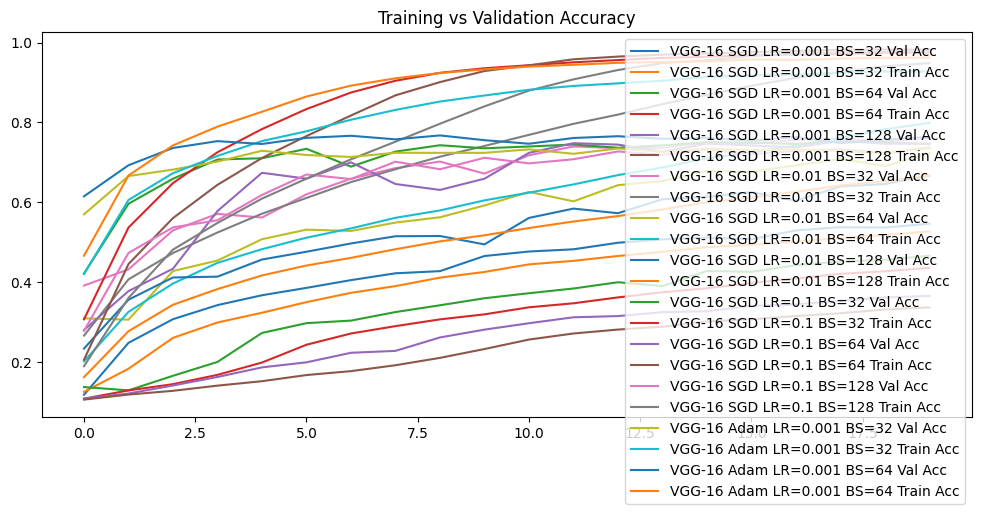

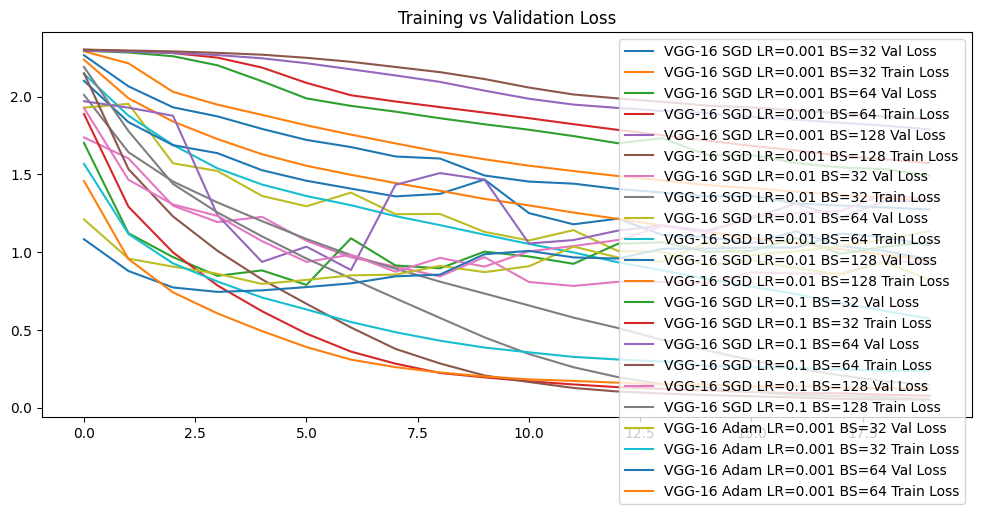

In [ ]:
plot_history(experiments)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


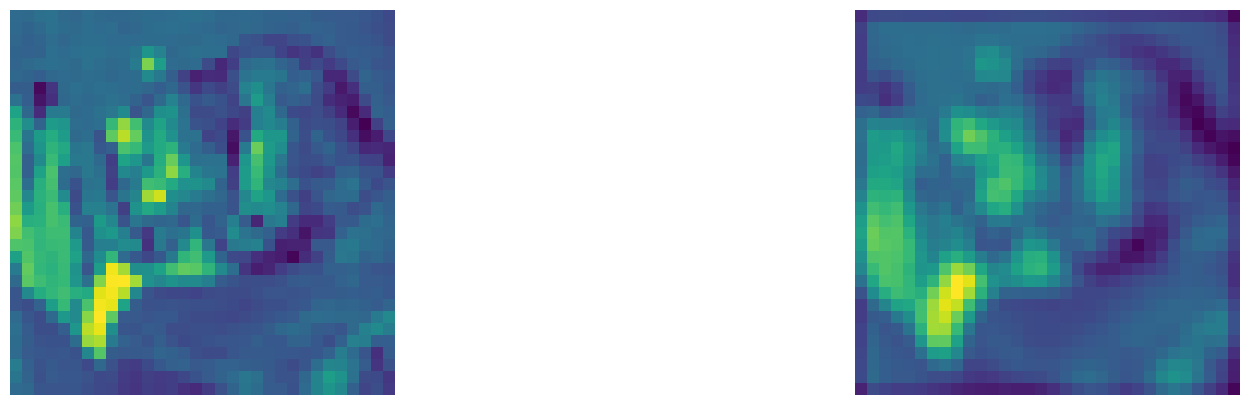

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


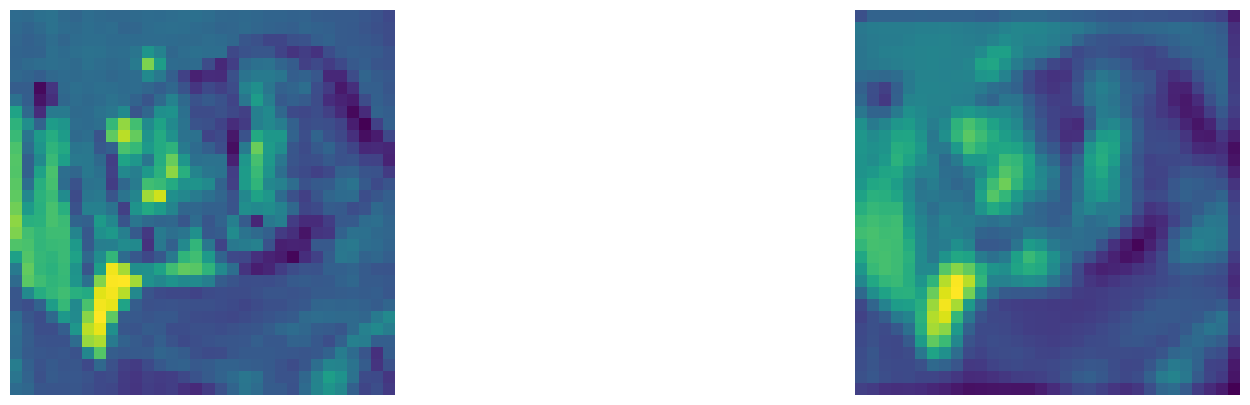

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


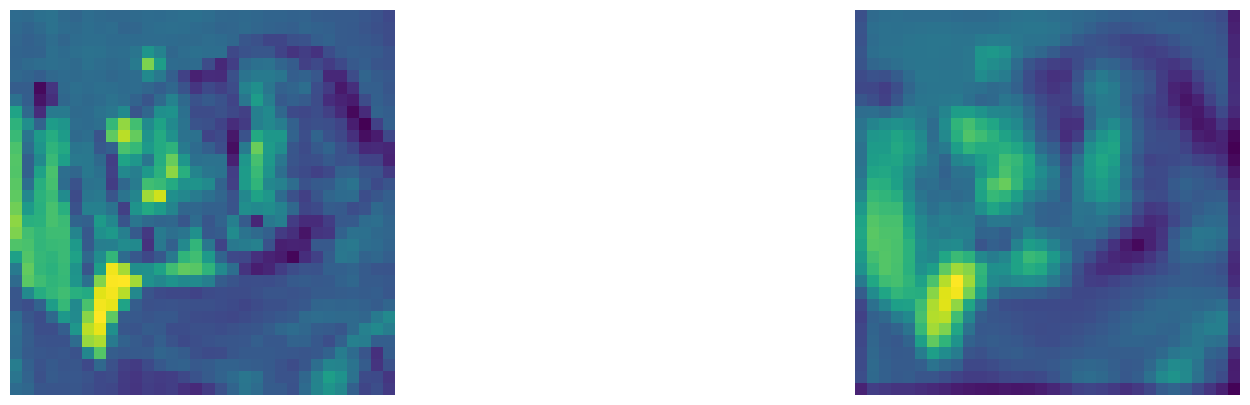

In [ ]:
def visualize_feature_maps(model, layer_index, img):
    layer_outputs = [layer.output for layer in model.layers[:layer_index]]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img.reshape(1, 32, 32, 3))
    fig, axes = plt.subplots(1, len(activations), figsize=(20,5))
    for i, activation in enumerate(activations):
        axes[i].imshow(np.mean(activation[0], axis=-1), cmap='viridis')
        axes[i].axis('off')
    plt.show()

# Visualize feature maps for all three models
sample_image = x_test[0]
for model_fn in models:
    model = model_fn()
    visualize_feature_maps(model, 2, sample_image)